In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
df = pd.read_csv("gender_classification.csv")

In [4]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [5]:
def get_info_dataframe(dataframe):
    print(f"DATAFRAME GENERAL INFO - \n")
    print(dataframe.info(),"\n")
    print(f"DATAFRAME MISSING INFO - \n")
    print(dataframe.isnull().sum(),"\n")
    print(f"DATAFRAME SHAPE INFO - \n")
    print(dataframe.shape)

In [6]:
get_info_dataframe(df)

DATAFRAME GENERAL INFO - 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB
None 

DATAFRAME MISSING INFO - 

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_lo

In [7]:
X = df.drop(["gender"],axis=1).values
y = df["gender"].values

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [9]:
scaler = StandardScaler()
encoder = LabelEncoder()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [12]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
class NeuralNetworkClassificationModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(NeuralNetworkClassificationModel,self).__init__()
        self.input_layer    = nn.Linear(input_dim,128)
        self.hidden_layer1  = nn.Linear(128,64)
        self.output_layer   = nn.Linear(64,output_dim)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self,x):
        out =  self.relu(self.input_layer(x))
        out =  self.relu(self.hidden_layer1(out))
        out =  self.softmax(self.output_layer(out))
        return out

In [14]:
n_features = X.shape[1]
n_classes = len(np.unique(y))

In [15]:
# input_dim = 4 because we have 4 inputs namely sepal_length,sepal_width,petal_length,petal_width
# output_dim = 3 because we have namely 3 categories setosa,versicolor and virginica
input_dim  = n_features
output_dim = n_classes
model = NeuralNetworkClassificationModel(input_dim,output_dim)

In [16]:
# creating our optimizer and loss function object
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [17]:
def train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses):
    for epoch in range(num_epochs):
        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()

        #forward feed
        output_train = model(X_train)

        #calculate the loss
        loss_train = criterion(output_train, y_train)



        #backward propagation: calculate gradients
        loss_train.backward()

        #update the weights
        optimizer.step()


        output_test = model(X_test)
        loss_test = criterion(output_test,y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

In [18]:
num_epochs = 1000
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [19]:
train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses)

Epoch 50/1000, Train Loss: 0.3331, Test Loss: 0.3442
Epoch 100/1000, Train Loss: 0.3311, Test Loss: 0.3472
Epoch 150/1000, Train Loss: 0.3305, Test Loss: 0.3472
Epoch 200/1000, Train Loss: 0.3297, Test Loss: 0.3479
Epoch 250/1000, Train Loss: 0.3288, Test Loss: 0.3474
Epoch 300/1000, Train Loss: 0.3288, Test Loss: 0.3475
Epoch 350/1000, Train Loss: 0.3287, Test Loss: 0.3476
Epoch 400/1000, Train Loss: 0.3287, Test Loss: 0.3476
Epoch 450/1000, Train Loss: 0.3287, Test Loss: 0.3478
Epoch 500/1000, Train Loss: 0.3287, Test Loss: 0.3479
Epoch 550/1000, Train Loss: 0.3287, Test Loss: 0.3480
Epoch 600/1000, Train Loss: 0.3287, Test Loss: 0.3481
Epoch 650/1000, Train Loss: 0.3287, Test Loss: 0.3482
Epoch 700/1000, Train Loss: 0.3287, Test Loss: 0.3482
Epoch 750/1000, Train Loss: 0.3287, Test Loss: 0.3483
Epoch 800/1000, Train Loss: 0.3287, Test Loss: 0.3484
Epoch 850/1000, Train Loss: 0.3287, Test Loss: 0.3484
Epoch 900/1000, Train Loss: 0.3287, Test Loss: 0.3484
Epoch 950/1000, Train Loss: 0

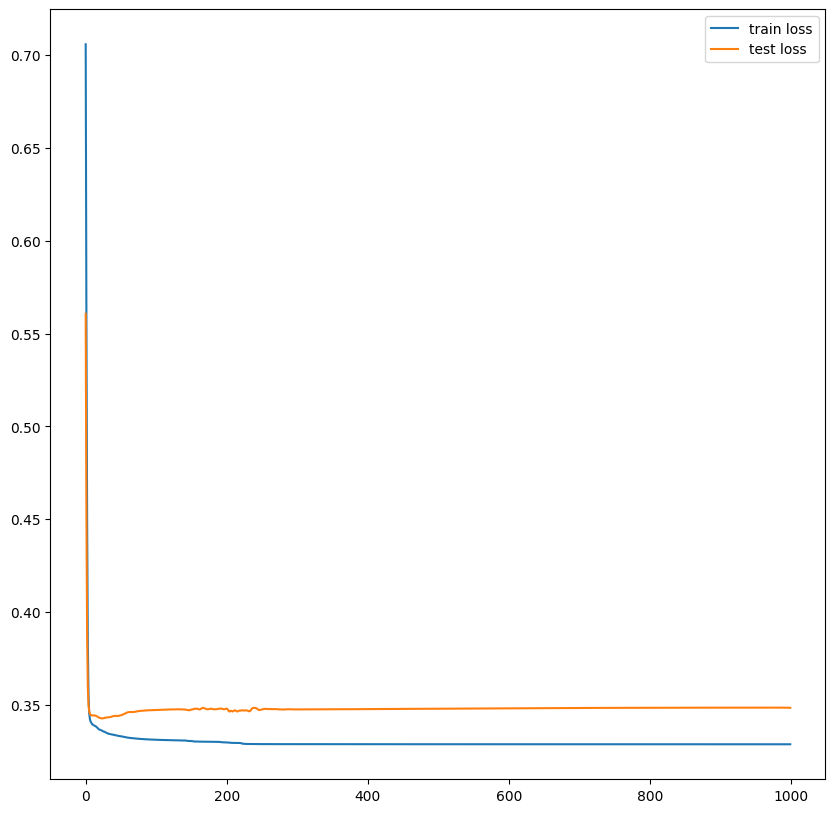

In [20]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [21]:
predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)

In [22]:
predictions_test

tensor([[5.6311e-24, 1.0000e+00],
        [1.0000e+00, 6.1689e-35],
        [1.0000e+00, 4.6921e-20],
        ...,
        [6.6141e-23, 1.0000e+00],
        [3.1578e-25, 1.0000e+00],
        [5.6032e-22, 1.0000e+00]])

In [23]:
def get_accuracy_multiclass(pred_arr,original_arr):
    if len(pred_arr)!=len(original_arr):
        return False
    pred_arr = pred_arr.numpy()
    original_arr = original_arr.numpy()
    final_pred= []
    # we will get something like this in the pred_arr [32.1680,12.9350,-58.4877]
    # so will be taking the index of that argument which has the highest value here 32.1680 which corresponds to 0th index
    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0
    #here we are doing a simple comparison between the predicted_arr and the original_arr to get the final accuracy
    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)

In [24]:
train_acc = get_accuracy_multiclass(predictions_train,y_train)
test_acc  = get_accuracy_multiclass(predictions_test,y_test)

In [25]:
print(f"Training Accuracy: {round(train_acc*100,3)}")
print(f"Test Accuracy: {round(test_acc*100,3)}")

Training Accuracy: 98.457
Test Accuracy: 96.336
